Loading data/train.csv
Loading data/test.csv
Done Loading Data
Begin Training
Epoch 1/10
10000/10000 [==============================] - 0s 42us/step
Epoch 2/10
10000/10000 [==============================] - 0s 25us/step
Epoch 3/10
10000/10000 [==============================] - 0s 25us/step
Epoch 4/10
10000/10000 [==============================] - 0s 28us/step
Epoch 5/10
10000/10000 [==============================] - 0s 28us/step
Epoch 6/10
10000/10000 [==============================] - 0s 28us/step
Epoch 7/10
10000/10000 [==============================] - 0s 26us/step
Epoch 8/10
10000/10000 [==============================] - 0s 25us/step
Epoch 9/10
10000/10000 [==============================] - 0s 30us/step
Epoch 10/10
10000/10000 [==============================] - 0s 25us/step
Training model with [300, 5] hidden layers
Begin Training
Epoch 1/10
10000/10000 [==============================] - 0s 40us/step
Epoch 2/10
10000/10000 [==============================] - 0s 26us/step
Epoch 3/10


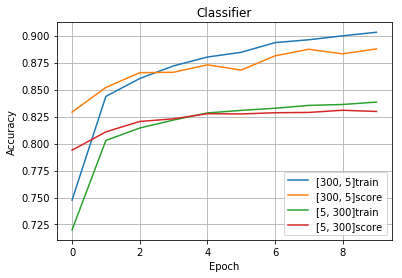

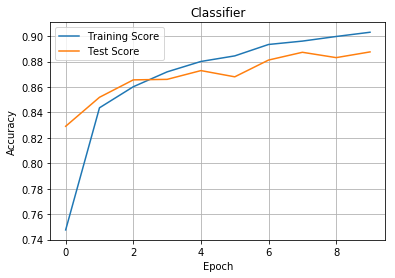

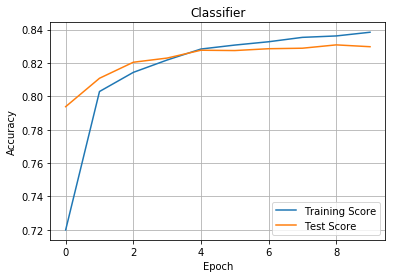

In [5]:

from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Flatten
from keras.layers.advanced_activations import LeakyReLU
from keras.regularizers import l2, l1
from keras.optimizers import Adam, SGD, RMSprop, Nadam
from keras.callbacks import Callback

import numpy as np
import matplotlib.pyplot as plt

class AccuracyHistory(Callback):
    def __init__(self, data, label):
        self.data = data
        self.label = label

    def on_train_begin(self,logs={}):
        self.acc = []
        self.test = []

    def on_epoch_end(self,batch, logs={}):
        self.acc.append(logs.get('acc'))
        self.test.append(self.model.evaluate(self.data, self.label)[1])

class NerualNetwork():
    def __init__(self, name = "temp", hidden_layer = 10, regularization = 0.0):
        self.name = name
        self.input_dimension = 784
        self.hidden_layer = hidden_layer
        self.regularization = regularization
        self.output_dimension = 10
        self.model = None
        self.opt = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    
        self.build_model()
    
    def build_model(self):
        self.model = Sequential([
            Dense(self.hidden_layer[0], input_dim = self.input_dimension, activation = 'relu', kernel_regularizer = l2(self.regularization)),
            Dense(self.hidden_layer[1], activation = 'relu'), 
            Dense(self.output_dimension, activation = 'softmax')
        ])
        self.model.compile(optimizer = 'adam', loss = "sparse_categorical_crossentropy", metrics=['accuracy'])

    def load_data(self, train, test):
        self.trainData = []
        self.trainLabel = []
        self.testData = []
        self.testLabel = []
        with open(train, 'r') as f:
            print("Loading {}".format(train))
            header = True;
            data = []
            label = []
            for line in f:
                if (header):
                    header = False
                    continue
                image = line.split(',')
                data.append(list(map(int,image[1:])))
                #lab = [0 for i in range(10)]
                #lab[int(image[0])] = 1
                label.append(image[0])
            self.trainData = np.array(data) / 255
            self.trainLabel = np.array(label)
        with open(test, 'r') as f:
            print("Loading {}".format(test))
            header = True;
            data = []
            label = []
            for line in f:
                if (header):
                    header = False
                    continue
                image = line.split(',')
                data.append(list(map(int, image[1:])))
                #lab = [0 for i in range(10)]
                #lab[int(image[0])] = 1
                label.append(image[0])
            self.testData = np.array(data) / 255
            self.testLabel = np.array(label)
        print("Done Loading Data")

    def train(self, epochs = 100, batch_size = 32):
        print("Begin Training")
        history = AccuracyHistory(self.testData, self.testLabel)
        self.model.fit(self.trainData, self.trainLabel, epochs = epochs, batch_size = batch_size, callbacks=[history])
        self.plot(history.acc, history.test)

    def plot(self, acc, score):
        print("Training model with {0} hidden layers".format(self.hidden_layer))
        plt.figure()
        plt.plot(range(len(acc)), acc, label="Training Score")
        plt.plot(range(len(score)), score, label = "Test Score")
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.title('Classifier')
        plt.grid(True)
        plt.savefig("model/2layer2.0/" + self.name + ".png")
        plt.figure("combined")
        plt.plot(range(len(acc)), acc, label = str(self.hidden_layer) + "train")
        plt.plot(range(len(acc)), score, label = str(self.hidden_layer) + "score")

    def initcombinedplot(self):
        plt.figure("combined")
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.title('Classifier')
        plt.grid(True)

    def savecombinedplot(self):
        plt.figure("combined")
        plt.legend()
        plt.savefig("model/2layer2.0/combined.png")
        
"""
    def load_data(self, train, test):
        self.load(train[0], self.input_dimension, self.trainData)
        self.load(train[1], 1, self.trainLabel)
        self.load(test[0], self.input_dimension, self.testData)
        self.load(test[1], 1, self.testLabel)

    def load(self, fileName, dataSize, saveTo):
        with open("data/" + fileName, 'rb') as f:
            data = []
            while True:
                sample = f.read(dataSize)
                if len(sample) == 0:
                    break
                data.append([b for b in sample])
        saveTo = np.array(data)
        print(saveTo.shape)
"""
if __name__ == '__main__':
    #sizes = [[5,5], [10,10], [25,25], [50,50], [100, 100], [200,200]]
    sizes = [[300, 5], [5, 300]]
    nnclassifier = NerualNetwork("[temprelu+softmax]Adam0.001", [10,10])
    nnclassifier.load_data("data/train.csv", "data/test.csv")
    nnclassifier.initcombinedplot()
    for i in sizes:
        nnclassifier.__init__("[" + str(i[0]) + "relu+" + str(i[1]) + "relu+softmax]Adam0.001", i)
        #nnclassifier.load_data(("trainimages", "trainlabels"), ("testimages", "testlabels"))
        nnclassifier.train(epochs=10, batch_size=100)
    nnclassifier.savecombinedplot()